In [140]:
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv('googleplaystore.csv')
df_playstore = pd.DataFrame(data)
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [142]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [82]:
'None' in df_playstore['Reviews'].unique()

False

In [143]:
df_playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [61]:
df_playstore.Reviews.unique()

array(['None'], dtype=object)

In [144]:
def replace_character(text):
    if 'M' in text:
        return float(text.replace('M','')) * 1000000
    if '$' in text:
        return text.replace('$', '')
    if 'Everyone' in text:
        return -1
    return text

In [145]:
df_playstore['Reviews'] = df_playstore.Reviews.apply(lambda x : replace_character(str(x)))
df_playstore['Price'] = df_playstore.Price.apply(lambda x : replace_character(str(x)))

In [146]:
to_categorical = ['App', 'Category', 'Size', 'Installs', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
for col in to_categorical:
    df_playstore[col] = df_playstore[col].astype('category')
    

In [147]:
to_numeric = ['Price', 'Reviews']
for col in to_numeric:
    df_playstore[col] = df_playstore[col].astype('float64')
#     df_playstore[col] = pd.to_numeric(df_playstore[col])

In [148]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null category
Category          10841 non-null category
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null category
Installs          10841 non-null category
Type              10840 non-null category
Price             10841 non-null float64
Content Rating    10840 non-null category
Genres            10841 non-null category
Last Updated      10841 non-null object
Current Ver       10833 non-null category
Android Ver       10838 non-null category
dtypes: category(9), float64(3), object(1)
memory usage: 997.2+ KB


In [149]:
from datetime import datetime as dt
def convert_to_date(string):
    if not '.' in string:
        return dt.strptime(string, '%B %d, %Y').date().strftime('%m/%d/%Y')

convert_to_date('July 25, 2017')

'07/25/2017'

In [150]:
df_playstore['Last Updated'] = df_playstore['Last Updated'].apply(lambda x: convert_to_date(str(x)))
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null category
Category          10841 non-null category
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null category
Installs          10841 non-null category
Type              10840 non-null category
Price             10841 non-null float64
Content Rating    10840 non-null category
Genres            10841 non-null category
Last Updated      10840 non-null object
Current Ver       10833 non-null category
Android Ver       10838 non-null category
dtypes: category(9), float64(3), object(1)
memory usage: 997.2+ KB


In [152]:
df_playstore['Last Updated'] = df_playstore['Last Updated'].astype('datetime64[ns]')
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null category
Category          10841 non-null category
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null category
Installs          10841 non-null category
Type              10840 non-null category
Price             10841 non-null float64
Content Rating    10840 non-null category
Genres            10841 non-null category
Last Updated      10840 non-null datetime64[ns]
Current Ver       10833 non-null category
Android Ver       10838 non-null category
dtypes: category(9), datetime64[ns](1), float64(3)
memory usage: 997.2 KB


In [153]:
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


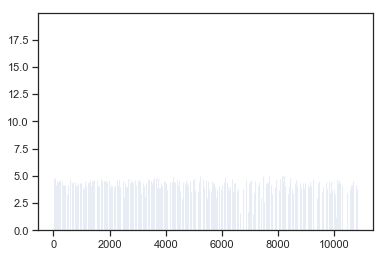

In [88]:
plt.bar(df_playstore.index, df_playstore['Rating'], align='center', alpha=0.5)
plt.show()

In [89]:
import seaborn as sns
sns.set(style="ticks")

[(0, 7)]

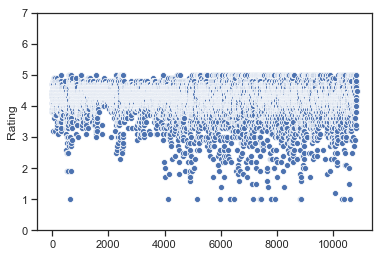

In [90]:
ax=sns.scatterplot(data=df_playstore, x=df_playstore.index, y="Rating")
ax.set(ylim=(0,7))

In [34]:
df_playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


[(0, 7)]

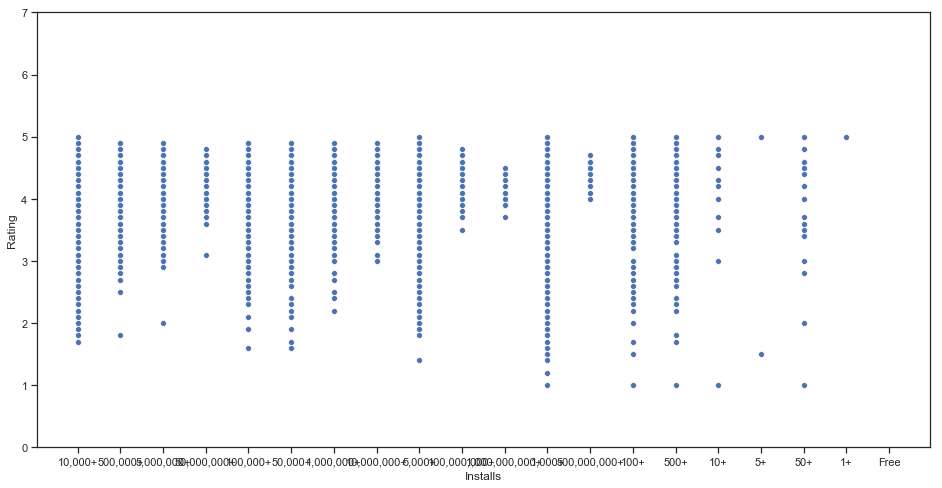

In [38]:
plt.figure(figsize=(16, 8))
installs_rating = sns.scatterplot(data=df_playstore, x='Installs', y="Rating")
a4_dims = (11.7, 8.27)
installs_rating.set(ylim=(0,7))

In [39]:
df_playstore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [40]:
df_playstore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

[(0, 7)]

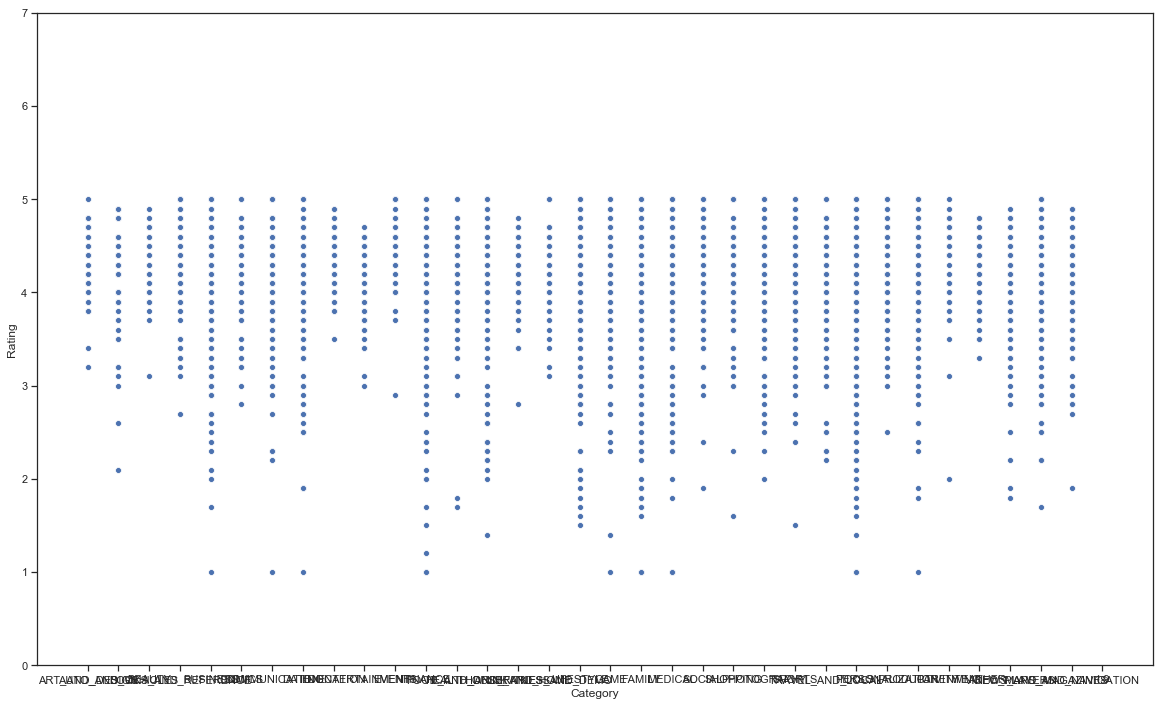

In [43]:
plt.figure(figsize=(20, 12))
category_rating = sns.scatterplot(data=df_playstore, x='Category', y="Rating")
category_rating.set(ylim=(0,7))

In [154]:
# Convert to Categorical columns:
# df_playstore['Category_cat'] = pd.Categorical(df_playstore['Category']).codes
df_playstore['Category_cat'] = pd.Categorical(df_playstore['Category']).codes
df_playstore['Type_cat'] = pd.Categorical(df_playstore['Type']).codes
df_playstore['Content_Rating_cat'] = pd.Categorical(df_playstore['Content Rating']).codes
df_playstore['Genres_cat'] = pd.Categorical(df_playstore['Genres']).codes
df_playstore['Current_Ver_cat'] = pd.Categorical(df_playstore['Current Ver']).codes
df_playstore['Android_ver_cat'] = pd.Categorical(df_playstore['Android Ver']).codes

df_playstore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_cat,Type_cat,Content_Rating_cat,Genres_cat,Current_Ver_cat,Android_ver_cat
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,12,1,1,39,638,17
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,12,1,1,39,113,17
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,21,1,1,72,113,7
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,4,1,3,19,2765,32
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19M,"10,000,000+",Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,19,1,1,68,2765,32


In [91]:
df_playstore['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [155]:
# Predicting 'Rating'. Divide data into train and test
import numpy as np
df_test = df_playstore[df_playstore['Rating'].isnull()]
df_train = df_playstore[df_playstore['Rating'].notnull()]

In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 19 columns):
App                   9367 non-null category
Category              9367 non-null category
Rating                9367 non-null float64
Reviews               9367 non-null float64
Size                  9367 non-null category
Installs              9367 non-null category
Type                  9367 non-null category
Price                 9367 non-null float64
Content Rating        9366 non-null category
Genres                9367 non-null category
Last Updated          9366 non-null datetime64[ns]
Current Ver           9363 non-null category
Android Ver           9364 non-null category
Category_cat          9367 non-null int8
Type_cat              9367 non-null int8
Content_Rating_cat    9367 non-null int8
Genres_cat            9367 non-null int8
Current_Ver_cat       9367 non-null int16
Android_ver_cat       9367 non-null int8
dtypes: category(9), datetime64[ns](1), float64(3), int16

In [166]:
feature_columns = ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 
                   'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

In [167]:
df_train.corr()

,Rating,Reviews,Price,Category_cat,Type_cat,Content_Rating_cat,Genres_cat,Current_Ver_cat,Android_ver_cat
Rating,1.000000,0.067645,-0.021362,-0.039488,0.025518,0.011881,-0.045489,0.050986,0.063803
Reviews,0.067645,1.000000,-0.009830,0.000701,-0.043603,0.070298,-0.012378,0.112484,0.125403
Price,-0.021362,-0.009830,1.000000,-0.012882,0.222884,-0.014051,-0.003658,-0.038040,-0.012076
Category_cat,-0.039488,0.000701,-0.012882,1.000000,0.024166,-0.105278,0.774137,0.117133,0.100048
Type_cat,0.025518,-0.043603,0.222884,0.024166,1.000000,-0.045738,0.004850,-0.078832,-0.092828
Content_Rating_cat,0.011881,0.070298,-0.014051,-0.105278,-0.045738,1.000000,-0.143332,0.012076,0.022989
Genres_cat,-0.045489,-0.012378,-0.003658,0.774137,0.004850,-0.143332,1.000000,0.117338,0.106341
Current_Ver_cat,0.050986,0.112484,-0.038040,0.117133,-0.078832,0.012076,0.117338,1.000000,0.545216
Android_ver_cat,0.063803,0.125403,-0.012076,0.100048,-0.092828,0.022989,0.106341,0.545216,1.000000


In [168]:
df_train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_cat,Type_cat,Content_Rating_cat,Genres_cat,Current_Ver_cat,Android_ver_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,1,1,9,118,15
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,1,1,12,1018,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,1,1,9,464,15
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,1,1,4,9,2765,18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1,1,1,11,277,20


In [110]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [111]:
# Single Variable Distributions: Histograms and Boxplots
df_train['Category'].iplot(kind='hist', xTitle = 'App Category', yTitle = 'Frequency')

In [164]:
import plotly.plotly as py
import plotly.graph_objs as go

In [165]:
layout = go.Layout(
    barmode='group'
)

In [ ]:

df_train['Category'].iplot(kind='hist', xTitle = 'App Category', yTitle = 'Frequency', layout=layout)

In [114]:
df_train[['Reviews', 'Price']].iplot(kind='hist', histnorm='percent', barmode='overlay')

In [160]:
# tds[['claps', 'fans', 'title']].iplot(
#     y='claps', mode='lines+markers', secondary_y = 'fans',
#     secondary_y_title='Fans', xTitle='Date', yTitle='Claps',
#     text='title', title='Fans and Claps over Time')


df_train[['Genres_cat', 'Last Updated']].iplot(x='Last Updated', kind='scatter')

([<matplotlib.axis.YTick at 0x13442cfd0>,
 <a list of 9 Text yticklabel objects>)

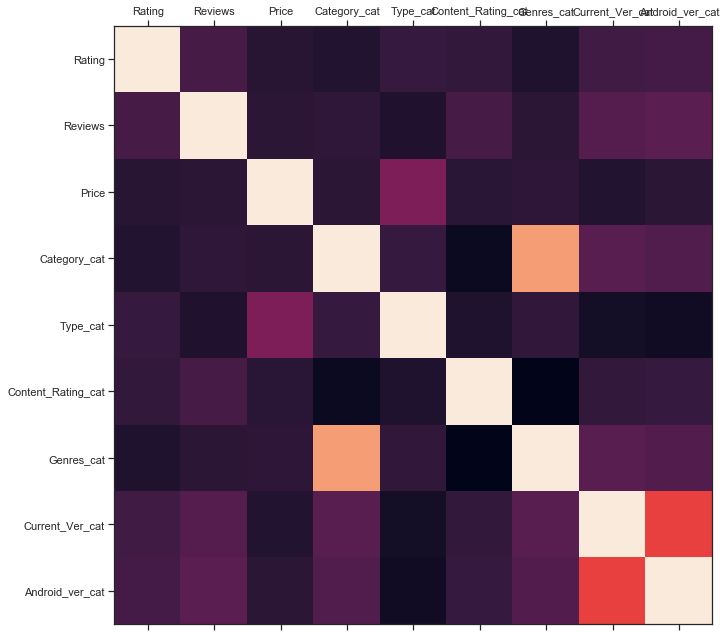

In [163]:
corr = df_train.corr()    #data frame correlation function
fig, ax = plt.subplots(figsize=(11,11))
ax.matshow(corr)    # color code  the rectangles by correlation value
plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
plt.yticks(range(len(corr.columns)), corr.columns)

In [169]:
df_train['Updated_Year'] = df_train['Last Updated'].apply(lambda x: str(x).split('-')[0])
df_train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_cat,Type_cat,Content_Rating_cat,Genres_cat,Current_Ver_cat,Android_ver_cat,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,1,1,9,118,15,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,1,1,12,1018,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,1,1,9,464,15,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,1,1,4,9,2765,18,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1,1,1,11,277,20,2018


In [170]:
df_train[['Genres_cat', 'Updated_Year']].iplot(x='Updated_Year', kind='scatter')